# Walkability Accessment of Graz, Austria

Authors: Bernadette Kakuska, Clemens Wallisch, Elias Pfleger, Paul []

Date: 01.12.2025

> Kevic, K., Kuveždic Divjak, A., Zrno, K., and Vilicic, M. (2024). Open Data Supporting GIS-based Walkability Assessment: Case Study for City of Zagreb, Croatia, Int. Arch. Photogramm. Remote Sens. Spatial Inf. Sci., XLVIII-5-2024, 23–29, https://doi.org/10.5194/isprs-archives-XLVIII-5-2024-23-2024.

### Data Preperation

In [1]:
# install libraries

#!pip install pandas geopandas shapely numpy matplotlib plotly keplergl h3 scikit-learn

In [5]:
# import libraries
import pandas as pd        
import numpy as np
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Polygon
import osmnx as ox

# Visualisation
from keplergl import KeplerGl  

# Spatial analysis
import h3 # Hexagonal grid indexing
#from sklearn.cluster import DBSCAN # Clustering for hotspot detection

Load the districts of Graz and merge them with the pop csv  (shp data converted in QGIS from Overpass)
(source of population data: https://www.graz.at/cms/beitrag/10034466/7772565/Zahlen_Fakten_Bevoelkerung_Bezirke_Wirtschaft.html)

In [ ]:
#get the districts of Graz
gdf_districts = gpd.read_file("districts_graz.shp")
gdf_districts.head(18)

,id,@id,@relations,admin_leve,boundary,name,official_n,postal_cod,ref_at_okz,type,wikidata,wikipedia,geometry
0,relation/102537,relation/102537,None,9,administrative,Innere Stadt,None,None,17453,boundary,Q250880,de:Innere Stadt (Graz),"POLYGON ((15.44371 47.06706, 15.44347 47.0671,..."
1,relation/102546,relation/102546,None,9,administrative,Liebenau,None,None,None,boundary,Q876432,de:Liebenau (Graz),"POLYGON ((15.468 47.04249, 15.46804 47.04237, ..."
2,relation/102553,relation/102553,None,9,administrative,Sankt Leonhard,St. Leonhard,None,17454,boundary,Q1530101,de:St. Leonhard (Graz),"POLYGON ((15.46177 47.06758, 15.46174 47.06756..."
3,relation/102572,relation/102572,None,9,administrative,Geidorf,None,None,17455,boundary,Q1498675,de:Geidorf,"POLYGON ((15.42348 47.09566, 15.42354 47.09563..."
4,relation/102586,relation/102586,None,9,administrative,Lend,None,None,None,boundary,Q1817435,de:Lend (Graz),"POLYGON ((15.41171 47.08701, 15.41192 47.08691..."
5,relation/102590,relation/102590,None,9,administrative,Gries,None,None,None,boundary,Q591759,de:Gries (Graz),"POLYGON ((15.43497 47.06629, 15.43459 47.06415..."
6,relation/102593,relation/102593,None,9,administrative,Jakomini,None,None,None,boundary,Q1604327,de:Jakomini,"POLYGON ((15.43497 47.06629, 15.43535 47.06627..."
7,relation/102600,relation/102600,None,9,administrative,Sankt Peter,St. Peter,None,None,boundary,Q2322480,de:St. Peter (Graz),"POLYGON ((15.49337 47.03554, 15.4931 47.03551,..."
8,relation/102614,relation/102614,None,9,administrative,Waltendorf,None,None,None,boundary,Q2543329,de:Waltendorf,"POLYGON ((15.50818 47.06991, 15.50825 47.06975..."
9,relation/102615,relation/102615,None,9,administrative,Ries,None,None,None,boundary,Q1670387,de:Ries (Graz),"POLYGON ((15.47509 47.07798, 15.4752 47.07826,..."


             name                                           geometry
0    Innere Stadt  POLYGON ((15.44371 47.06706, 15.44347 47.0671,...
1        Liebenau  POLYGON ((15.468 47.04249, 15.46804 47.04237, ...
2  Sankt Leonhard  POLYGON ((15.46177 47.06758, 15.46174 47.06756...
3         Geidorf  POLYGON ((15.42348 47.09566, 15.42354 47.09563...


<Axes: >

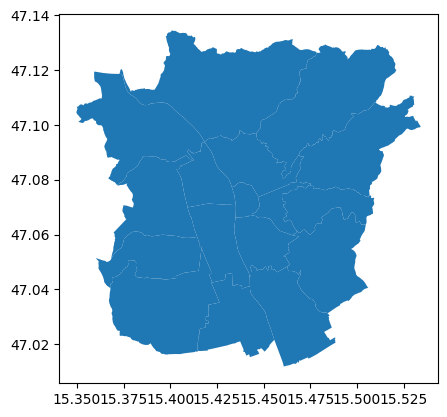

In [ ]:
#extract the columns which are needed
gdf_districts = gdf_districts[["name", "geometry"]].copy()
print(gdf_districts.head(4))
gdf_districts.plot()

In [ ]:
#loading csv with pop data of graz 
df_popgraz = pd.read_csv("Bevoelkerung Graz.csv", encoding="latin1", sep=";")
df_popgraz.head(18)

,Bezirk,Größe in km2,Einwohner,Einwohner pro km2
0,Innere Stadt,"1,16",3184,2745
1,Sankt Leonhard,"1,83",14692,8028
2,Geidorf,"5,5",23770,4322
3,Lend,"3,7",34308,9324
4,Gries,"5,05",30511,6042
5,Jakomini,"4,06",32114,7910
6,Liebenau,"7,99",16588,2076
7,Sankt Peter,"8,86",16615,1875
8,Waltendorf,"4,48",12432,2775
9,Ries,"10,16",6099,600


In [ ]:
#merge the two datasets
gdf_districts_pop = gdf_districts.merge(df_popgraz, left_on="name", right_on="Bezirk")
gdf_districts_pop.head(18)

,name,geometry,Bezirk,Größe in km2,Einwohner,Einwohner pro km2
0,Innere Stadt,"POLYGON ((15.44371 47.06706, 15.44347 47.0671,...",Innere Stadt,"1,16",3184,2745
1,Liebenau,"POLYGON ((15.468 47.04249, 15.46804 47.04237, ...",Liebenau,"7,99",16588,2076
2,Sankt Leonhard,"POLYGON ((15.46177 47.06758, 15.46174 47.06756...",Sankt Leonhard,"1,83",14692,8028
3,Geidorf,"POLYGON ((15.42348 47.09566, 15.42354 47.09563...",Geidorf,"5,5",23770,4322
4,Lend,"POLYGON ((15.41171 47.08701, 15.41192 47.08691...",Lend,"3,7",34308,9324
5,Gries,"POLYGON ((15.43497 47.06629, 15.43459 47.06415...",Gries,"5,05",30511,6042
6,Jakomini,"POLYGON ((15.43497 47.06629, 15.43535 47.06627...",Jakomini,"4,06",32114,7910
7,Sankt Peter,"POLYGON ((15.49337 47.03554, 15.4931 47.03551,...",Sankt Peter,"8,86",16615,1875
8,Waltendorf,"POLYGON ((15.50818 47.06991, 15.50825 47.06975...",Waltendorf,"4,48",12432,2775
9,Ries,"POLYGON ((15.47509 47.07798, 15.4752 47.07826,...",Ries,"10,16",6099,600


Get the POIs and merge them into one GDF

In [ ]:
PLACE_NAME:str = "Graz, Austria"

                                    geometry category
element id                                           
node    251710886  POINT (15.43675 47.07188)   retail
        271624001  POINT (15.47242 47.05671)   retail
        278691038   POINT (15.4427 47.06992)   retail
        288172339  POINT (15.40841 47.07185)   retail
        290422098  POINT (15.45518 47.06741)   retail


<Axes: >

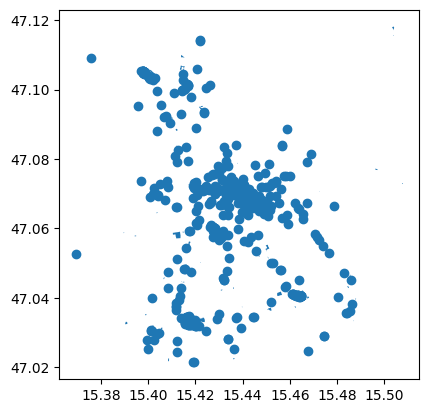

In [52]:
tags_retail = {
    "shop": [
        "clothes", "shoes", "furniture", "electronics", "computer",
        "mobile_phone", "kitchen", "houseware", "hardware", "doityourself",
        "books", "stationery", "jewelry", "boutique", "sports", "outdoor",
        "bicycle", "car", "car_repair", "motorcycle",
        "department_store", "mall", "variety_store", "general"
    ]
}

gdf_retail = ox.features_from_place(PLACE_NAME, tags_retail)
gdf_retail = gdf_retail[["geometry"]].copy()
gdf_retail["category"] = "retail"
print(gdf_retail.head(5))
gdf_retail.plot()


                                   geometry category
element id                                          
node    21015347  POINT (15.43238 47.02987)     food
        26899232  POINT (15.44826 47.07568)     food
        31611256   POINT (15.4581 47.06301)     food
        31620673   POINT (15.4342 47.02831)     food
        31620704  POINT (15.46442 47.03997)     food


<Axes: >

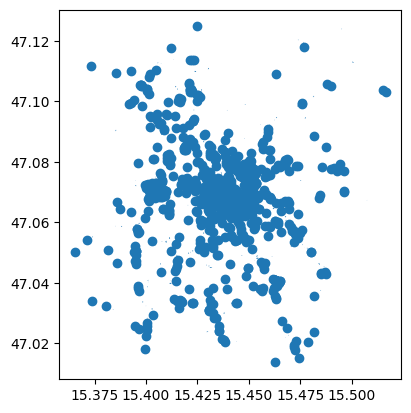

In [53]:
tags_food = {
    "amenity": [
        "supermarket", "marketplace", "greengrocer",
        "restaurant", "cafe", "fast_food", "ice_cream",
        "bar", "pub", "biergarten",
        "bakery"
    ],
    "shop": ["supermarket", "convenience", "greengrocer", "butcher", "seafood"]
}

gdf_food = ox.features_from_place(PLACE_NAME, tags_food)
gdf_food = gdf_food[["geometry"]].copy()
gdf_food["category"] = "food"
print(gdf_food.head(5))
gdf_food.plot()

                                    geometry       category
element id                                                 
node    31625435   POINT (15.43796 47.06991)  entertainment
        31625437      POINT (15.45 47.06382)  entertainment
        107935777  POINT (15.43765 47.04397)  entertainment
        251710896  POINT (15.44063 47.07142)  entertainment
        492011184  POINT (15.39263 47.07637)  entertainment


<Axes: >

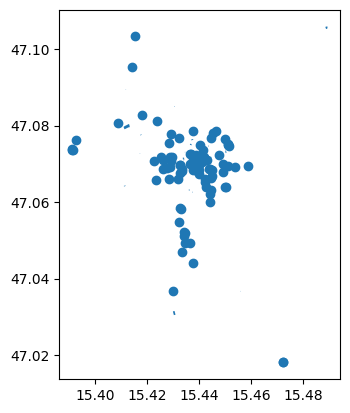

In [54]:
tags_entertainment = {
    "amenity": ["cinema", "theatre", "arts_centre", "nightclub", "casino"],
    "tourism": ["museum", "gallery"]
}

gdf_entertainment = ox.features_from_place(PLACE_NAME, tags_entertainment)
gdf_entertainment = gdf_entertainment[["geometry"]].copy()
gdf_entertainment["category"] = "entertainment"
print(gdf_entertainment.head(5))
gdf_entertainment.plot()

                                    geometry category
element id                                           
node    266657602  POINT (15.45089 47.06318)   office
        279089642  POINT (15.43966 47.07262)   office
        369490755  POINT (15.43934 47.06822)   office
        569570749  POINT (15.44646 47.07484)   office
        837234659  POINT (15.43417 47.05871)   office
<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 962 entries, ('node', np.int64(266657602)) to ('way', np.int64(1410449338))
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  962 non-null    geometry
 1   category  962 non-null    object  
dtypes: geometry(1), object(1)
memory usage: 57.9+ KB


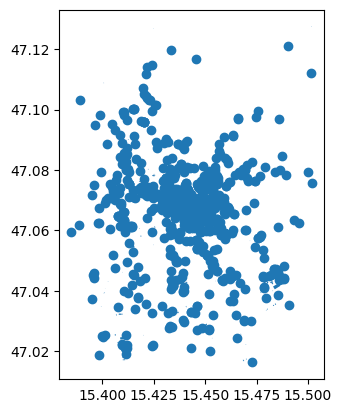

In [57]:
tags_office = {"office": True}
gdf_office = ox.features_from_place(PLACE_NAME, tags_office)
gdf_office = gdf_office[["geometry"]].copy()    
gdf_office["category"] = "office"
print(gdf_office.head(5))
gdf_office.plot()
gdf_office.info()

                                    geometry category
element id                                           
node    26899380   POINT (15.43737 47.06753)    civic
        26899638   POINT (15.46345 47.06607)    civic
        26899640   POINT (15.43932 47.06861)    civic
        117124121     POINT (15.483 47.0471)    civic
        269062537  POINT (15.41311 47.06663)    civic


<Axes: >

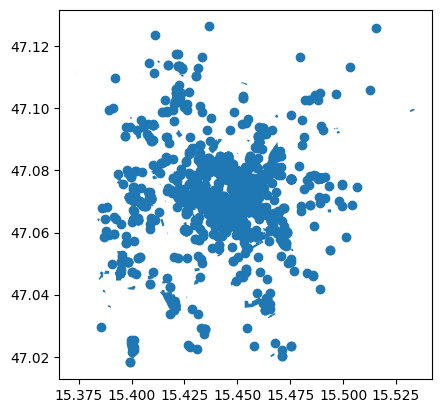

In [58]:
tags_civic = {
    "amenity": [
        "school", "university", "college",
        "hospital", "clinic", "doctors", "dentist",
        "police", "fire_station", "townhall",
        "library", "post_office", "courthouse"
    ]
}
gdf_civic = ox.features_from_place(PLACE_NAME, tags_civic)
gdf_civic = gdf_civic[["geometry"]].copy()
gdf_civic["category"] = "civic"
print(gdf_civic.head(5))
gdf_civic.plot()

                                    geometry category
element id                                           
node    197819750  POINT (15.45903 47.07323)    sport
        278113673  POINT (15.42145 47.07183)    sport
        291464359  POINT (15.45846 47.07323)    sport
        859421763  POINT (15.38524 47.09008)    sport
        940994980  POINT (15.42787 47.08845)    sport
<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 5427 entries, ('node', np.int64(197819750)) to ('way', np.int64(1452490981))
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  5427 non-null   geometry
 1   category  5427 non-null   object  
dtypes: geometry(1), object(1)
memory usage: 272.4+ KB


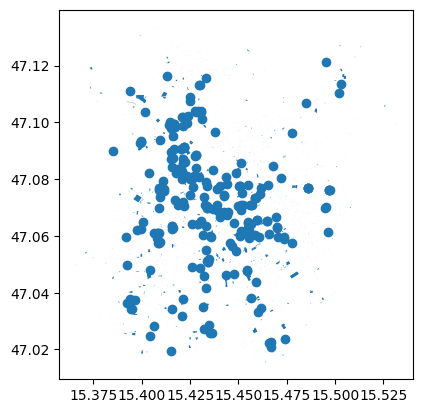

In [59]:
sport_tags = {
    "leisure": [
        "sports_centre", "pitch", "stadium", "swimming_pool", "fitness_centre",
        "playground", "miniature_golf"
    ],
}

gdf_sport = ox.features_from_place(PLACE_NAME, sport_tags)
gdf_sport = gdf_sport[["geometry"]].copy()
gdf_sport["category"] = "sport"
print(gdf_sport.head(5))
gdf_sport.plot()
gdf_sport.info()

In [66]:
#only point geometry for POIs
def only_points (gdf):
    gdf = gdf[["geometry", "category"]].copy()
    gdf = gdf.to_crs("EPSG:32633") #UTM zone 33N for Graz
    gdf['geometry'] = gdf.geometry.centroid
    gdf = gdf.to_crs("EPSG:4326") #back to WGS84
    gdf = gdf[gdf.geometry.type == "Point"].copy()
    gdf = gdf.reset_index(drop=True)
    return gdf

In [67]:
gdf_retail = only_points(gdf_retail)
gdf_food = only_points(gdf_food)
gdf_civic = only_points(gdf_civic)
gdf_sport = only_points(gdf_sport)
gdf_office = only_points(gdf_office)
gdf_entertainment = only_points(gdf_entertainment)

In [68]:
gdf_retail.head(3)

,geometry,category
0,POINT (15.43675 47.07188),retail
1,POINT (15.47242 47.05671),retail
2,POINT (15.4427 47.06992),retail


In [ ]:
#final merge of all POI categories
gdf_pois = gpd.GeoDataFrame(pd.concat([gdf_retail, gdf_food, gdf_civic, gdf_sport, gdf_office, gdf_entertainment], ignore_index=True))
gdf_pois.info()
gdf_pois['category'].value_counts()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10146 entries, 0 to 10145
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  10146 non-null  geometry
 1   category  10146 non-null  object  
dtypes: geometry(1), object(1)
memory usage: 158.7+ KB


category
sport            5427
civic            1503
food             1403
office            962
retail            726
entertainment     125
Name: count, dtype: int64

Add Blues and Greens of Graz (source: https://land.copernicus.eu/en/products/urban-atlas?tab=land_coverland_use)

In [81]:
gdf_greenspaces = gpd.read_file("urban_atlas_graz.shp")
print(gdf_greenspaces.head(3))
gdf_greenspaces["class_2018"].value_counts()

       fid country fua_name fua_code code_2018  \
0  11376.0      AT     Graz  AT002L3     12220   
1  29134.0      AT     Graz  AT002L3     12230   
2  29165.0      AT     Graz  AT002L3     12230   

                        class_2018 prod_date     identifier     perimeter  \
0  Other roads and associated land   2020-08  31338-AT002L3  1.708235e+07   
1     Railways and associated land   2020-08  31641-AT002L3  4.043997e+04   
2     Railways and associated land   2020-08  31642-AT002L3  1.191133e+05   

           area comment  Pop2018  \
0  6.076743e+07    None        0   
1  3.488787e+05    None        0   
2  1.497519e+06    None        0   

                                            geometry  
0  MULTIPOLYGON (((15.43787 47.12816, 15.43792 47...  
1  POLYGON ((15.40437 47.01663, 15.40463 47.01769...  
2  POLYGON ((15.35952 47.11876, 15.35955 47.11877...  


class_2018
Discontinuous medium density urban fabric (S.L. : 30% - 50%)    905
Discontinuous dense urban fabric (S.L. : 50% -  80%)            659
Industrial, commercial, public, military and private units      614
Discontinuous low density urban fabric (S.L. : 10% - 30%)       611
Pastures                                                        339
Continuous urban fabric (S.L. : > 80%)                          274
Arable land (annual crops)                                      161
Forests                                                         155
Green urban areas                                               152
Discontinuous very low density urban fabric (S.L. : < 10%)      128
Isolated structures                                             125
Sports and leisure facilities                                    90
Land without current use                                         74
Water                                                            25
Railways and associated land         

                                            geometry         class_2018  \
0  POLYGON ((15.44205 47.03268, 15.44218 47.03274...              Water   
1  POLYGON ((15.43098 47.0345, 15.43194 47.03455,...  Green urban areas   
2  POLYGON ((15.44226 47.04103, 15.4421 47.04108,...  Green urban areas   

  code_2018  
0     50000  
1     14100  
2     14100  


<Axes: >

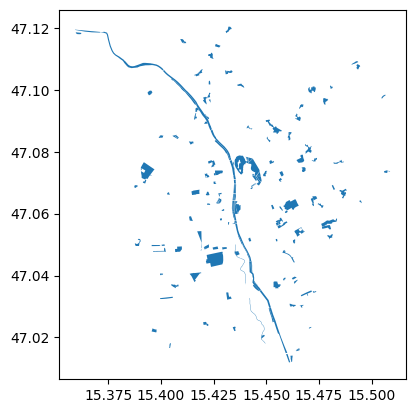

In [86]:
gdf_greens_blue = gdf_greenspaces[gdf_greenspaces["class_2018"].isin(["Green urban areas", "Water"])].copy()
gdf_greens_blue = gdf_greens_blue[["geometry", "class_2018", "code_2018"]].copy()
gdf_greens_blue = gdf_greens_blue.reset_index(drop=True)
print(gdf_greens_blue.head(3))
gdf_greens_blue.plot()

Get the walking network of Graz for routing


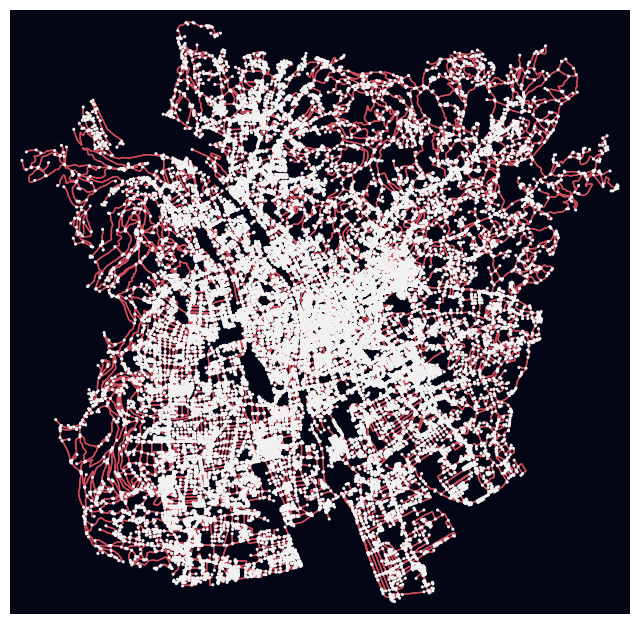

In [75]:
G = ox.graph_from_place(PLACE_NAME, network_type="walk")
G = ox.project_graph(G, to_crs = "EPSG:32633")
fig, ax = ox.plot_graph(G, node_size=5, bgcolor= "#040615", node_color='#f1f1f1', edge_color='#d44e5c')